<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


### Data Analytics of Airbnb Data:

#### Objective:

In this excercise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

You can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price, availability, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
sns.set_style("ticks")
sns.set_palette("pastel")
sns.set_context("notebook")
sns.set_theme(style="darkgrid")

In [3]:
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

In [4]:
## Display the first 5 rows
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [5]:
## Display the data types
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset. 
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [6]:
df["country"].value_counts()

United States    102067
Name: country, dtype: int64

This information from this airbnb dataset is just for New York so we can drop country and country code. We're not planning on conducting geospatial analysis so we can also drop latitude and longitude as neighbourhood will give us the location information we need. Host and listing name's are also not relevant and dropping that information aids anonymity.

In [7]:
d_col = ["country", "country code", "host id", "id", "host name", "NAME", "lat", "long"]

In [8]:
df.drop(d_col, axis=1, inplace=True)
df.dtypes

host_identity_verified             object
neighbourhood group                object
neighbourhood                      object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                        object
license                            object
dtype: object

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [9]:
## Check for missing values in the dataframe and display the count in ascending order.
missing_values = df.isna()
missing_count = missing_values.sum().sort_values(ascending=True)

# view the proportion of missing values
proportion_missing = missing_values.sum() / len(df)
proportion_count = proportion_missing.sort_values(ascending=True)

side_by_side = pd.concat([missing_count, proportion_count], axis=1)
side_by_side.columns = ['Missing Count', 'Proportion']
side_by_side

Missing Count  Proportion
room type                                   0    0.000000
neighbourhood                              16    0.000156
neighbourhood group                        29    0.000283
cancellation_policy                        76    0.000741
instant_bookable                          105    0.001023
number of reviews                         183    0.001784
Construction year                         214    0.002086
price                                     247    0.002407
service fee                               273    0.002661
host_identity_verified                    289    0.002817
calculated host listings count            319    0.003109
review rate number                        326    0.003177
minimum nights                            409    0.003986
availability 365                          448    0.004367
reviews per month                       15879    0.154768
last review                             15893    0.154904
house_rules                             52131    0.508104
license                                102597    0.999981

License details are almost universally missing and we don't need them for analysis so we'll drop the column. House_rules also is missing over 50% of the values and isn't something you could accurately impute with the tools at hand (or possibly at all). 

Last review and reviews per month could be missing not at random. It could occur when the location itself simply has not received any reviews, this would explain why the missing figures are so similar for the two columns. We'll cross reference against number of reviews.

In [10]:
# checking intuition on reviews confirms our suspicions
df[df["number of reviews"] == 0].shape

(15734, 18)

In [11]:
df["number of reviews"] = df["number of reviews"].fillna(0)
df["reviews per month"] = df["reviews per month"].fillna(0)
df["last review"] = df["last review"].fillna(pd.NaT)

In [12]:
df.drop(["house_rules","license"], axis=1, inplace=True)

All other values are missing at a rate of <5% (and even <0.5%) so we could likely impute them without serious consequences to our analysis. We will impute price and service fee later after we've converted them to floats.

In [13]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
df.duplicated().sum()

3636

In [14]:
df.drop_duplicates(inplace=True)
## Display the total number of records in the dataframe after removing the duplicates.
df.shape[0]

98963

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshots of your work.

In [15]:
## Rename the column.
df.rename(columns={"availability 365": "days_booked"}, inplace=True)

In [16]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
for column in df.columns:
    new_column = column.lower().replace(" ", "_")
    df.rename(columns={column: new_column}, inplace=True)

In [17]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['service_fee'] = df['service_fee'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [18]:
# change last_review to a datetime data type
df['last_review'] = pd.to_datetime(df['last_review'], format = "%m/%d/%Y")

In [19]:
df.dtypes

host_identity_verified                    object
neighbourhood_group                       object
neighbourhood                             object
instant_bookable                          object
cancellation_policy                       object
room_type                                 object
construction_year                        float64
price                                    float64
service_fee                              float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
review_rate_number                       float64
calculated_host_listings_count           float64
days_booked                              float64
dtype: object

### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [20]:
## List the count of various room types avaliable with Airbnb
df["room_type"].value_counts()

Entire home/apt    51908
Private room       44796
Shared room         2144
Hotel room           115
Name: room_type, dtype: int64

In [21]:
df["cancellation_policy"].value_counts()

moderate    33133
flexible    32895
strict      32859
Name: cancellation_policy, dtype: int64

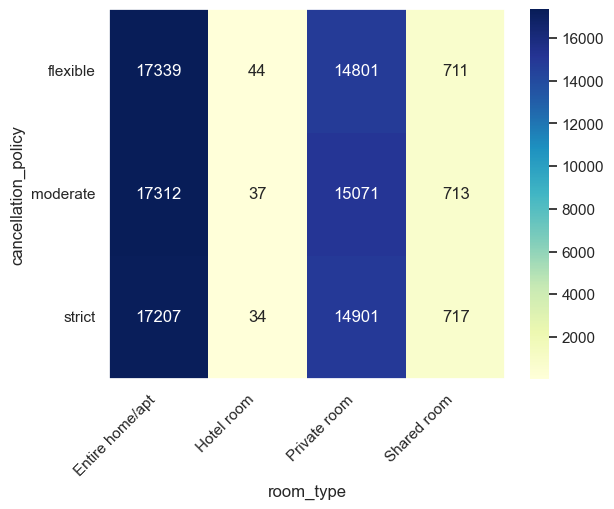

In [22]:
## Which room type adheres to more strict cancellation policy
cross_tab = pd.crosstab(df['cancellation_policy'], df['room_type'])
ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for _, spine in ax.spines.items():
    spine.set_visible(True)

# Display the plot
plt.show()

None of the room types have that significant of a difference but shared rooms have more locations with strict cancellation policies, 699 against 695 and 685 locations with moderate and flexible policies respectively.

In [23]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
df_neighbourhoodg = df.groupby("neighbourhood_group")

In [24]:
df_neighbourhoodg['price'].mean().sort_values(ascending=False)

neighbourhood_group
Queens           629.579933
Staten Island    627.277412
Bronx            627.079969
Brooklyn         626.405554
Manhattan        622.687900
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64

In [25]:
df_neighbourhoodg['price'].median().sort_values(ascending=False)

neighbourhood_group
Bronx            631.0
Staten Island    630.0
Queens           627.0
Brooklyn         626.0
Manhattan        621.0
brookln          580.0
manhatan         460.0
Name: price, dtype: float64

The most expensive neighbourhood group by mean is Queens. However, this could be due to some particularly expensive outlier listings as the median for the Bronx is $10 higher.

## Task 5a: Data Visualization (Any Tool)

- Create a horizontal bar chart to display the top 10 most expensive neighborhoods in the dataset.
    - Create another chart with the 10 cheapest neighborhoods in the dataset.
- Create a box and whisker chart that showcases the price distribution of all listings split by room type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [26]:
df.columns.unique()

Index(['host_identity_verified', 'neighbourhood_group', 'neighbourhood',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count', 'days_booked'],
      dtype='object')

We'll display the top 10 most expensive neighbourhoods by grouping by neighbourhood and looking through the mean of their respective prices, taking the top 10  and converting it back into a dataframe rather than a groupby object. We'll do something similar for the least expensive.

Text(0.5, 1.0, 'Top 10 most expensive neighbourhoods')

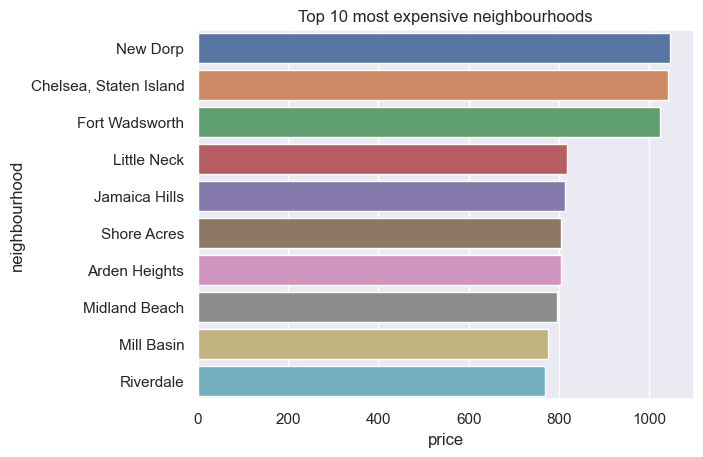

In [27]:
df_neighbourhood_prices_high = df.groupby('neighbourhood')['price'].mean().nlargest(10).reset_index()
sns.barplot(x="price", y="neighbourhood", data=df_neighbourhood_prices_high)
plt.title("Top 10 most expensive neighbourhoods")

Text(0.5, 1.0, 'Top 10 least expensive neighbourhoods')

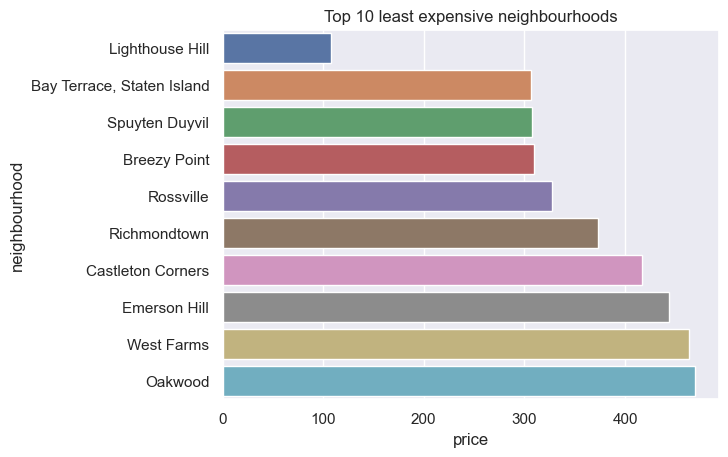

In [28]:
df_neighbourhood_prices_low = df.groupby('neighbourhood')['price'].mean().nsmallest(10).reset_index()
sns.barplot(x="price", y="neighbourhood", data=df_neighbourhood_prices_low)
plt.title("Top 10 least expensive neighbourhoods")

<Axes: xlabel='room_type', ylabel='price'>

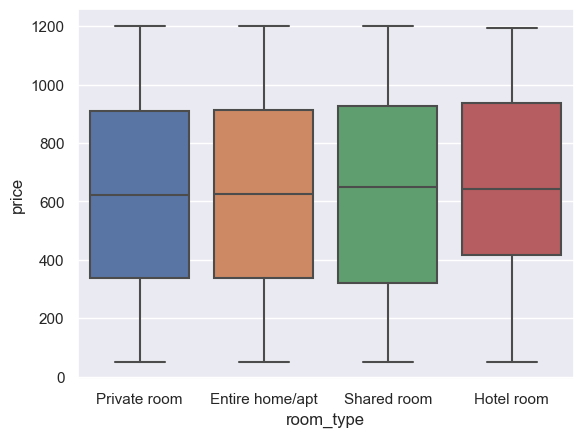

In [29]:
sns.boxplot(x='room_type',y='price', data=df)

## Task 5b: Data Visualization (Any Tool)

- Create a scatter plot to illustrate the relationship between the cleaning fee and the room price and write down the kind of correlation, if any, that you see.
- Create a line chart to showcase the total amount of listings available per year (???).

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

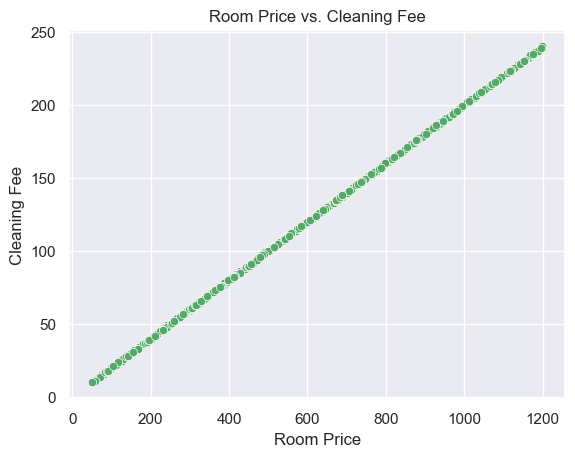

In [36]:
sns.scatterplot(x='price', y='service_fee', color = 'g', data=df)
plt.xlabel('Room Price')
plt.ylabel('Cleaning Fee')
plt.title('Room Price vs. Cleaning Fee')
plt.show()

There is a very strong positive correlation between price and cleaning/service fee. It looks almost like a perfectly linear relationship. We could easily impute missing cleaning/service fees and room prices 

## Task 5c: Data Visualization (Any Tool)

- Create a data visualization of your choosing using one of the review columns in isolation or in combination with another column.
- Create a visualization to compare at least two different variables between super hosts and regular hosts.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [31]:
#sns.displot(x = "construction_year", hue = "price", bins = 10, data=df)

In [32]:
df.construction_year.value_counts().sort_values()

2013.0    4843
2016.0    4848
2021.0    4856
2004.0    4856
2018.0    4874
2011.0    4877
2017.0    4896
2015.0    4920
2007.0    4930
2012.0    4934
2005.0    4943
2022.0    4956
2010.0    4957
2003.0    4964
2009.0    4989
2020.0    4998
2019.0    4999
2006.0    5018
2008.0    5035
2014.0    5056
Name: construction_year, dtype: int64

In [33]:
df.head()

host_identity_verified neighbourhood_group neighbourhood instant_bookable  \
0            unconfirmed            Brooklyn    Kensington            False   
1               verified           Manhattan       Midtown            False   
2                    NaN           Manhattan        Harlem             True   
3            unconfirmed            Brooklyn  Clinton Hill             True   
4               verified           Manhattan   East Harlem            False   

  cancellation_policy        room_type  construction_year  price  service_fee  \
0              strict     Private room             2020.0  966.0        193.0   
1            moderate  Entire home/apt             2007.0  142.0         28.0   
2            flexible     Private room             2005.0  620.0        124.0   
3            moderate  Entire home/apt             2005.0  368.0         74.0   
4            moderate  Entire home/apt             2009.0  204.0         41.0   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0            10.0                9.0  2021-10-19               0.21   
1            30.0               45.0  2022-05-21               0.38   
2             3.0                0.0         NaT               0.00   
3            30.0              270.0  2019-07-05               4.64   
4            10.0                9.0  2018-11-19               0.10   

   review_rate_number  calculated_host_listings_count  days_booked  
0                 4.0                             6.0        286.0  
1                 4.0                             2.0        228.0  
2                 5.0                             1.0        352.0  
3                 4.0                             1.0        322.0  
4                 3.0                             1.0        289.0